# Dataset Overview

In [1]:
import os
import sys
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

# Ensure project root is on sys.path so `surgical_phase_tool` is importable
project_root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

from surgical_phase_tool.config_loader import load_config
from surgical_phase_tool.dataset import PHASE_TO_ID, TOOL_COLUMNS

cfg = load_config()
train_manifest = cfg["paths"]["train_manifest_resolved"]
test_manifest = cfg["paths"]["test_manifest_resolved"]

In [2]:
train_df = pd.read_csv(train_manifest)
test_df = pd.read_csv(test_manifest)
train_df.shape, test_df.shape

((2962, 15), (741, 15))

In [3]:
# Phase distribution (train)
phase_counts = train_df['phase'].value_counts().reindex(list(PHASE_TO_ID.keys())).fillna(0).astype(int)
phase_counts

phase
Preparation                400
CalotTriangleDissection    400
ClippingCutting            400
GallbladderDissection      400
CleaningCoagulation        400
GallbladderPackaging       162
GallbladderRetraction      400
Undefined                  400
Name: count, dtype: int64

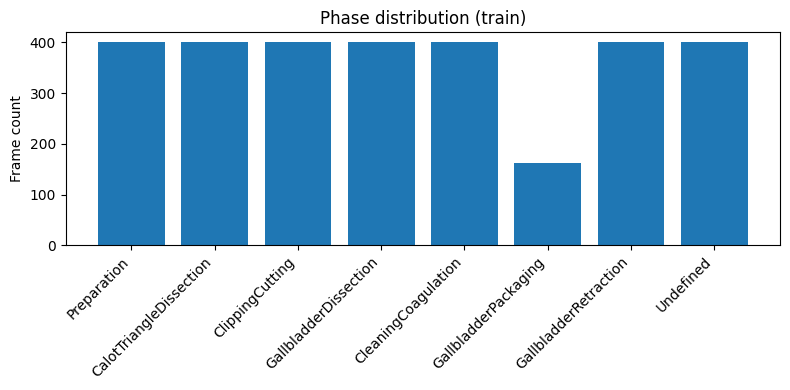

In [4]:
plt.figure(figsize=(8, 4))
phases = list(PHASE_TO_ID.keys())
values = [phase_counts.get(p, 0) for p in phases]
plt.bar(range(len(phases)), values)
plt.xticks(range(len(phases)), phases, rotation=45, ha='right')
plt.ylabel('Frame count')
plt.title('Phase distribution (train)')
plt.tight_layout()
plt.show()

In [ ]:
# Tool distribution (train)
tool_counts = {t: int((train_df[t] == 1).sum()) for t in TOOL_COLUMNS}
total_tool = sum(tool_counts.values()) or 1
tool_summary = pd.DataFrame({
    'tool': list(tool_counts.keys()),
    'count': list(tool_counts.values()),
})
tool_summary['percent'] = (100.0 * tool_summary['count'] / total_tool).round(2)
tool_summary.set_index('tool')

{'Argonbeamer': 0,
 'Clip-Applicator': 800,
 'Drainage': 0,
 'Grasper': 0,
 'HF-Coagulation-Probe': 800,
 'Needle-Probe': 162,
 'Palpation-Probe': 0,
 'PE-Forceps': 1762,
 'Scissor': 1200,
 'Suction-Rod': 800,
 'Trocar-Tip': 400}

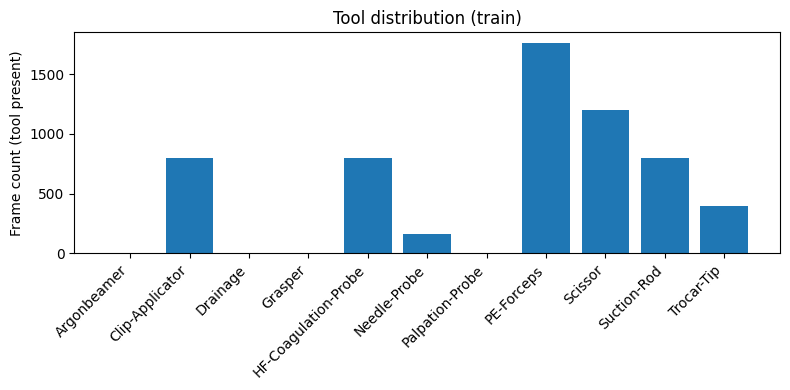

In [6]:
plt.figure(figsize=(8, 4))
tools = list(TOOL_COLUMNS)
values = [tool_counts.get(t, 0) for t in tools]
plt.bar(range(len(tools)), values)
plt.xticks(range(len(tools)), tools, rotation=45, ha='right')
plt.ylabel('Frame count (tool present)')
plt.title('Tool distribution (train)')
plt.tight_layout()
plt.show()

In [7]:
# Phase–tool co-occurrence (train)
grouped = train_df.groupby('phase')[TOOL_COLUMNS].sum().reindex(list(PHASE_TO_ID.keys()))
grouped

,Argonbeamer,Clip-Applicator,Drainage,Grasper,HF-Coagulation-Probe,Needle-Probe,Palpation-Probe,PE-Forceps,Scissor,Suction-Rod,Trocar-Tip
phase,,,,,,,,,,,
Preparation,0,0,0,0,0,0,0,400,0,0,0
CalotTriangleDissection,0,400,0,0,0,0,0,400,400,0,0
ClippingCutting,0,400,0,0,0,0,0,0,400,0,0
GallbladderDissection,0,0,0,0,400,0,0,400,400,400,0
CleaningCoagulation,0,0,0,0,400,0,0,0,0,400,0
GallbladderPackaging,0,0,0,0,0,162,0,162,0,0,0
GallbladderRetraction,0,0,0,0,0,0,0,400,0,0,400
Undefined,0,0,0,0,0,0,0,0,0,0,0


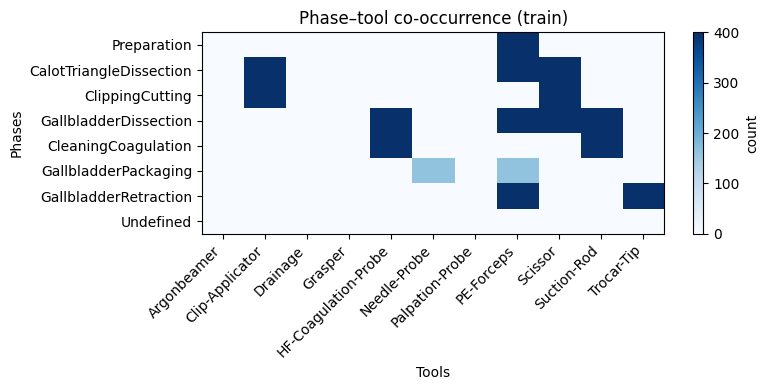

In [ ]:
plt.figure(figsize=(8, 4))
plt.imshow(grouped.values, aspect='auto', cmap='Blues')
plt.yticks(range(len(grouped.index)), grouped.index)
plt.xticks(range(len(TOOL_COLUMNS)), TOOL_COLUMNS, rotation=45, ha='right')
plt.xlabel('Tools')
plt.ylabel('Phases')
plt.title('Phase–tool co-occurrence (train)')
plt.colorbar(label='count')

# Add numeric annotations on heatmap
for i in range(grouped.shape[0]):
    for j in range(grouped.shape[1]):
        val = int(grouped.values[i, j])
        if val > 0:
            plt.text(j, i, str(val), ha='center', va='center', color='black', fontsize=8)

plt.tight_layout()
plt.show()